# DECODING DATA SCIENCE

### AIM

In this statistics project, we are trying to implement various statistical techniques to prioritize the skill sets of a Data Science Professional.Through this,we are trying to give better insights to aspiring Data Science Professionals on which skills they have to work upon.

### DATA 

As a data sample, we conducted a  survey on working professionals.The different job roles included are Data analyst, Data Scientist,Business Analyst and Data Engineer.We asked them to rate the different skills required  as per level of importance on a scale of 1-5.

### BREAKDOWN

#### 1.Importing Libraries
#### 2.Basic Methodology
#### 3.Estimation of Population mean at 95% Confidence Level
#### 4.Kurkswallis Test and Dunn's Test on each skill set under each Job Role
#### 5.Hypothesis Testing to compare skills of two job roles

### IMPORTING LIBRARIES

In [42]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import math
import scipy.stats as sp
from statsmodels.formula.api import ols
import statsmodels.api as sm
from statsmodels.stats.multicomp import pairwise_tukeyhsd


## BASIC METHODOLOGY

### The data consists of the responses of Professionals working as Business Analysts,Data Analysts and Data Scientists regarding the importance of each skill on a scale of 5.

### The techniques used for analysis is:

### 1.Using Estimation on each column to calculate the confidence interval of mean of each population with 95%confidence level.

### 2.Using Kruskalwallis Test to check whether any skill is statistically significant from the other for a particular job role.Post hoc pairwise test for multiple comparisons of mean rank sums (Dunn’s test). It is used after Kruskal-Wallis one-way analysis of variance by ranks to do pairwise comparisons of each group

### 3.Using hypothesis testing to compare two populations ( DATA ANALYST & DATA SCIENTIST) to gather an idea if there is significant difference between both roles on the basis of mastering of the above skills.

# ESTIMATION OF EACH SAMPLE TO CALCULATE THE POPULATION MEAN WITH 95% CONFIDENCE LEVEL

## PYTHON CODE FOR CONFIDENCE INTERVAL CALCULATION

In [205]:
import scipy.stats as stats
import math

# Specify sample mean (x_bar), sample standard deviation (s), sample size (n) and confidence level
x_bar =3.4167
s =0.5149
n = 11
confidence_level = 0.95

# Calculate alpha, degrees of freedom (df), the critical t-value, and the margin of error
alpha = (1-confidence_level)
df = n - 1
standard_error = s/math.sqrt(n)
critical_t = stats.t.ppf(1-alpha/2, df)
margin_of_error = critical_t * standard_error

# Calculate the lower and upper bound of the confidence interval
lower_bound = x_bar - margin_of_error
upper_bound = x_bar + margin_of_error

# Print the results
print("Critical t-value: {:.3f}".format(critical_t))
print("Margin of Error: {:.3f}".format(margin_of_error))
print("Confidence Interval: [{:.3f},{:.3f}]".format(lower_bound,upper_bound))
print("The {:.1%} confidence interval for the population mean is:".format(confidence_level))
print("between {:.3f} and {:.3f}".format(lower_bound,upper_bound))

Critical t-value: 2.228
Margin of Error: 0.346
Confidence Interval: [3.071,3.763]
The 95.0% confidence interval for the population mean is:
between 3.071 and 3.763


### BUSINESS ANALYST DATA

In [197]:
bad=pd.read_csv('C:\\Users\\USER\\Desktop\\BUSINESS ANALYST CONFIDENCE INTERVALS.csv')

In [198]:
bad

,BUSINESS ANALYST,CRITICAL T-VALUE,MARGIN OF ERROR,CONFIDENCE INTERVAL
0,PYTHON,2.228,0.314,"[1.413,2.041]"
1,STATS AND ML,2.228,0.621,"[1.015,2.257]"
2,ANALYTICAL,2.228,0.752,"[2.884,4.389]"
3,COMMUNICATION,2.228,0.621,"[4.016,5.257]"
4,DOMAIN,2.228,0.520,"[2.48,3.52]"
5,VISUALISATION,2.228,0.887,"[1.923,3.697]"
6,BIG DATA,2.228,0.339,"[1.021,1.679]"
7,SQL,2.228,0.471,"[1.438,2.380]"


In [199]:
Data.describe()

,python,stats,analytical,communication,domain,visualisation,big data,sql
count,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000
mean,1.727273,1.636364,3.636364,4.363636,3.000000,2.818182,1.363636,1.909091
std,0.467099,0.924416,1.120065,0.924416,0.774597,1.328020,0.504525,0.700649
min,1.000000,1.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000
25%,1.500000,1.000000,3.000000,4.000000,2.500000,2.000000,1.000000,1.500000
50%,2.000000,1.000000,4.000000,5.000000,3.000000,3.000000,1.000000,2.000000
75%,2.000000,2.000000,4.500000,5.000000,3.500000,4.000000,2.000000,2.000000
max,2.000000,4.000000,5.000000,5.000000,4.000000,5.000000,2.000000,3.000000


### DATA ANALYST DATA 

In [200]:
da=pd.read_csv('C:\\Users\\USER\\Desktop\\DATA ANALYST CONFIDENCE INTERVALS.csv')

In [201]:
da

,DATA ANALYST,CRITICAL T-VALUE,MARGIN OF ERROR,CONFIDENCE INTERVAL
0,PYTHON,2.228,0.537,"[2.823,3.897]"
1,STATS AND ML,2.228,0.528,"[2.192,3.248]"
2,ANALYTICAL,2.228,0.520,"[2.480,3.520]"
3,COMMUNICATION,2.228,0.551,"[2.903,4.005]"
4,DOMAIN,2.228,0.621,"[2.743,3.984]"
5,VISUALISATION,2.228,0.725,"[2.457,3.906]"
6,BIG DATA,2.228,0.634,"[1.457,2.725]"
7,SQL,2.228,0.453,"[3.183,4.089]"


In [202]:
Data1.describe()

,python,stats,analytical,communication,domain,visualisation,big data,sql
count,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000
mean,3.363636,2.727273,3.000000,3.454545,3.363636,3.181818,2.090909,3.636364
std,0.809040,0.786245,0.774597,0.820200,0.924416,1.078720,0.943880,0.674200
min,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000
25%,3.000000,2.000000,2.500000,3.000000,3.000000,2.000000,1.500000,3.000000
50%,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,2.000000,4.000000
75%,4.000000,3.000000,3.500000,4.000000,4.000000,4.000000,2.500000,4.000000
max,5.000000,4.000000,4.000000,5.000000,5.000000,5.000000,4.000000,5.000000


### DATA SCIENTIST DATA

In [203]:
ds=da=pd.read_csv('C:\\Users\\USER\\Desktop\\DATA SCIENTIST CONFIDENCE INTERVALS.csv')

In [204]:
ds

,DATA SCIENTIST,CRITICAL T-VALUE,MARGIN OF ERROR,CONFIDENCE INTERVAL
0,PYTHON,2.228,0.331,"[3.336,3.998]"
1,STATS AND ML,2.228,0.482,"[3.685,4.649]"
2,ANALYTICAL,2.228,0.405,"[3.595,4.405]"
3,COMMUNICATION,2.228,0.331,"[4.002,4.664]"
4,DOMAIN,2.228,0.345,"[3.071,3.761]"
5,VISUALISATION,2.228,0.482,"[3.351,4.315]"
6,BIG DATA,2.228,0.345,"[2.738,3.428]"
7,SQL,2.228,0.346,"[3.071,3.763]"


In [206]:
Data2.describe()

,python,stats,analytical,communication,domain,visualisation,big data,sql
count,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000
mean,3.666667,4.166667,4.000000,4.333333,3.416667,3.833333,3.083333,3.416667
std,0.492366,0.717741,0.603023,0.492366,0.514929,0.717741,0.514929,0.514929
min,3.000000,3.000000,3.000000,4.000000,3.000000,3.000000,2.000000,3.000000
25%,3.000000,4.000000,4.000000,4.000000,3.000000,3.000000,3.000000,3.000000
50%,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,3.000000
75%,4.000000,5.000000,4.000000,5.000000,4.000000,4.000000,3.000000,4.000000
max,4.000000,5.000000,5.000000,5.000000,4.000000,5.000000,4.000000,4.000000


# 3. LOADING BUSINESS ANALYSTS RESPONSES

In [91]:
Data = pd.read_csv('C:\\Users\\USER\\Desktop\\business analyst data.csv')

In [104]:
Data

,python,stats,analytical,communication,domain,visualisation,big data,sql
0,2,2,2,2,2,2,2,2
1,2,4,5,5,3,2,2,3
2,2,2,2,5,3,3,2,2
3,2,1,3,4,3,4,1,2
4,2,1,3,5,4,5,1,3
5,2,2,4,5,3,1,1,1
6,1,1,3,4,2,1,1,2
7,1,2,5,5,2,4,1,2
8,2,1,4,4,4,2,1,1
9,2,1,5,5,3,3,2,2


# KRUSKWALLIS TEST ON BUSINESS ANALYST RESPONSES

In [5]:
import pandas, sys
from scipy.stats import mstats
Data = pd.read_csv("C:\\Users\\USER\\Desktop\\business analyst data.csv")
H, pval = mstats.kruskalwallis([Data[col] for col in Data.columns])


print("H-statistic:\t%s\nP-value:\t%s" % (str(H),str(pval))) 
if pval < 0.05:
    print("Reject NULL hypothesis - Significant differences exist between groups.")
if pval > 0.05:
    print("Accept NULL hypothesis - No significant difference between groups.")

H-statistic:	49.70729307430267
P-value:	1.6487646318715428e-08
Reject NULL hypothesis - Significant differences exist between groups.


## As p-value < 0.05 , there is significant difference between the groups.To confirm and to identify which groups are significant, Dunn's Test is done.

In [8]:
pip install scikit-posthocs

^C
Note: you may need to restart the kernel to use updated packages.


### IMPORTING LIBRARY REQUIRED FOR DUNN'S TEST

In [88]:
import scikit_posthocs as sp

In [7]:
a=list(Data['python'].values)
b=list(Data['stats'].values)
c=list(Data['analytical'].values)
d=list(Data['communication'].values)
e=list(Data['domain'].values)
f=list(Data['visualisation'].values)
g=list(Data['big data'].values)
h=list(Data['sql'].values)
group=[a,b,c,d,e,f,g,h]

### PERFORMING DUNN'S TEST


In [8]:
dunn=sp.posthoc_dunn(group,p_adjust='bonferroni')

In [9]:
dunn

,1,2,3,4,5,6,7,8
1,1.000000,1.000000,0.024541,0.000541,0.353170,1.000000,1.000000,1.000000
2,1.000000,1.000000,0.005968,0.000094,0.114940,0.657030,1.000000,1.000000
3,0.024541,0.005968,1.000000,1.000000,1.000000,1.000000,0.000669,0.087181
4,0.000541,0.000094,1.000000,1.000000,1.000000,0.481740,0.000007,0.002677
5,0.353170,0.114940,1.000000,1.000000,1.000000,1.000000,0.019415,0.944282
6,1.000000,0.657030,1.000000,0.481740,1.000000,1.000000,0.148507,1.000000
7,1.000000,1.000000,0.000669,0.000007,0.019415,0.148507,1.000000,1.000000
8,1.000000,1.000000,0.087181,0.002677,0.944282,1.000000,1.000000,1.000000


### SHOWING VALUES LESS THAN 0.05 TO IDENTIFY WHICH ALL SKILLS ARE SIGNIFICANT FROM EACH OTHER
1-PYTHON 
2-STATISTICS AND MACHINE LEARNING
3-ANALYTICAL SKILLS
4-COMMUNICATION SKILLS
5-DOMAIN KNWOLEDGE
6-VISUALISATION
7-BIG DATA ANALYTICAL TOOLS
8-SQL

In [10]:
dunn[dunn<0.05]

,1,2,3,4,5,6,7,8
1,NaN,NaN,0.024541,0.000541,NaN,NaN,NaN,NaN
2,NaN,NaN,0.005968,0.000094,NaN,NaN,NaN,NaN
3,0.024541,0.005968,NaN,NaN,NaN,NaN,0.000669,NaN
4,0.000541,0.000094,NaN,NaN,NaN,NaN,0.000007,0.002677
5,NaN,NaN,NaN,NaN,NaN,NaN,0.019415,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,0.000669,0.000007,0.019415,NaN,NaN,NaN
8,NaN,NaN,NaN,0.002677,NaN,NaN,NaN,NaN


### INFERENCES:
#### 1.ANALYTICAL SKILLS AND COMMUNICATION SKILLS ARE SIGNIFICANTLY DIFFERENT FROM PYTHON AND STATS,WHICH MEANS THEY CAN BE GIVEN MORE FOCUS FOR BECOMING A BUSINESS ANALYST
#### 2.COMMUNICATION SKILLS ARE DIFFERENT FROM BIG DATA ANALYTICAL TOOLS AND SQL ALSO.
#### 3.DOMAIN KNOWLEDGE IS MORE IMPORTANT THAN BIG DATA ANALYTICAL TOOLS FOR A BUSINESS ANALYST
#### 4.COMMUNICATION SKILLS IS MORE IMPORTANT THAN SQL FOR A BUSINESS ANALYST

#### HENCE, FOR THE ROLE OF A BUSINESS ANALYST ANALYTICAL SKILLS,COMMUNICATION SKILLS ALONG WITH DOMAIN 
#### KNOWLEDE ARE THE PREFERRED AND REQUIRED SKILL SETS AS PER THE SAMPLE COLLECTED


In [102]:
import seaborn as sns


<AxesSubplot:>

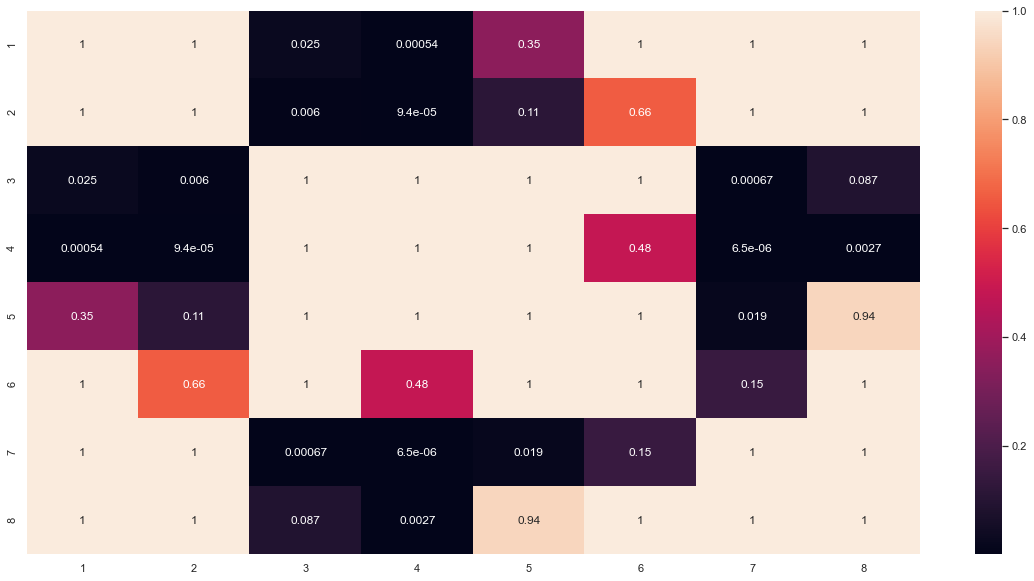

In [103]:
sns.heatmap(dunn,annot=True)

# LOADING DATA ANALYSTS RESPONSES

In [14]:
Data1 = pd.read_csv('C:\\Users\\USER\\Desktop\\Data Analyst Data.csv')

In [105]:
Data1

,python,stats,analytical,communication,domain,visualisation,big data,sql
0,4,4,4,5,3,4,4,4
1,3,3,3,3,2,2,2,3
2,3,2,2,2,2,2,2,3
3,2,3,3,4,3,3,3,3
4,3,3,4,3,5,5,1,5
5,3,2,3,4,4,3,1,4
6,5,2,2,3,4,2,2,3
7,4,3,3,3,4,4,2,4
8,3,2,3,4,3,4,3,4
9,4,4,4,4,4,4,1,4


# KRUKSWALLIS TEST ON DATA ANALYSTS RESPONSES

In [15]:
H, pval = mstats.kruskalwallis([Data1[col] for col in Data1.columns])


print("H-statistic:\t%s\nP-value:\t%s" % (str(H),str(pval))) 
if pval < 0.05:
    print("Reject NULL hypothesis - Significant differences exist between groups.")
if pval > 0.05:
    print("Accept NULL hypothesis - No significant difference between groups.")

H-statistic:	19.222993630517077
P-value:	0.007516753094664885
Reject NULL hypothesis - Significant differences exist between groups.


### As p-value <0.05,there is significant difference between the groups, i.e, the skill sets of a Data Analyst.In order to confirm which groups are significantly different, we perform post hoc test , i.e ,Dunn's Test.

In [106]:
a1=list(Data1['python'].values)
b1=list(Data1['stats'].values)
c1=list(Data1['analytical'].values)
d1=list(Data1['communication'].values)
e1=list(Data1['domain'].values)
f1=list(Data1['visualisation'].values)
g1=list(Data1['big data'].values)
h1=list(Data1['sql'].values)
group1=[a1,b1,c1,d1,e1,f1,g1,h1]

### Dunn's Test on Data Analysts Responses

In [17]:
dunn1=sp.posthoc_dunn(group1,p_adjust='bonferroni')

1-PYTHON 2-STATISTICS AND MACHINE LEARNING 3-ANALYTICAL SKILLS 4-COMMUNICATION SKILLS 
5-DOMAIN KNWOLEDGE 6-VISUALISATION 7-BIG DATA ANALYTICAL TOOLS 8-SQL

In [18]:
dunn1

,1,2,3,4,5,6,7,8
1,1.00000,1.000000,1.0,1.000000,1.000000,1.000000,0.110750,1.000000
2,1.00000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,0.523143
3,1.00000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000
4,1.00000,1.000000,1.0,1.000000,1.000000,1.000000,0.047291,1.000000
5,1.00000,1.000000,1.0,1.000000,1.000000,1.000000,0.103293,1.000000
6,1.00000,1.000000,1.0,1.000000,1.000000,1.000000,0.422052,1.000000
7,0.11075,1.000000,1.0,0.047291,0.103293,0.422052,1.000000,0.007784
8,1.00000,0.523143,1.0,1.000000,1.000000,1.000000,0.007784,1.000000


#### Values less than 0.05 is identified to find the statistically significant groups 

In [19]:
dunn1[dunn1<0.05]

,1,2,3,4,5,6,7,8
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,0.047291,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,0.047291,NaN,NaN,NaN,0.007784
8,NaN,NaN,NaN,NaN,NaN,NaN,0.007784,NaN


<AxesSubplot:>

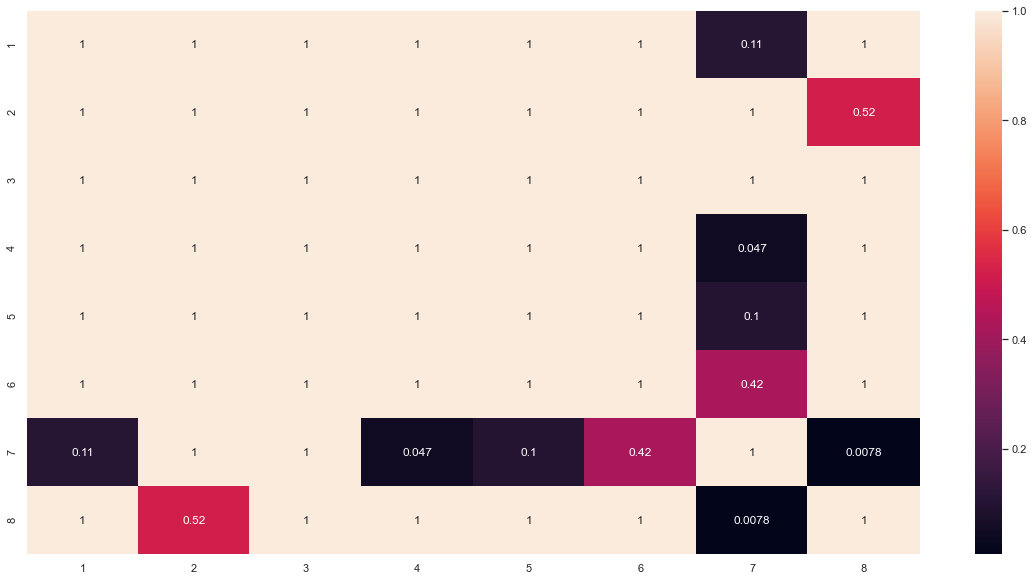

In [209]:
sns.heatmap(dunn1,annot=True)

### INFERENCES:
### Communication Skills and SQL are signicantly different from Big Data Tools.Hence for the role of a Data Analyst, both of these skills can be developed in a better way and all other skill sets are found to be similar as per the sample obtained.

In [20]:
Data1.describe()

,python,stats,analytical,communication,domain,visualisation,big data,sql
count,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000
mean,3.363636,2.727273,3.000000,3.454545,3.363636,3.181818,2.090909,3.636364
std,0.809040,0.786245,0.774597,0.820200,0.924416,1.078720,0.943880,0.674200
min,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000
25%,3.000000,2.000000,2.500000,3.000000,3.000000,2.000000,1.500000,3.000000
50%,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,2.000000,4.000000
75%,4.000000,3.000000,3.500000,4.000000,4.000000,4.000000,2.500000,4.000000
max,5.000000,4.000000,4.000000,5.000000,5.000000,5.000000,4.000000,5.000000


## LOADING DATA SCIENTISTS RESPONSES

In [21]:
Data2 = pd.read_csv('C:\\Users\\USER\\Desktop\\Data Scientist Data.csv')

## KURKSWALLIS TEST ON DATA SCIENTISTS RESPONSES 

In [22]:
H, pval = mstats.kruskalwallis([Data2[col] for col in Data2.columns])


print("H-statistic:\t%s\nP-value:\t%s" % (str(H),str(pval))) 
if pval < 0.05:
    print("Reject NULL hypothesis - Significant differences exist between groups.")
if pval > 0.05:
    print("Accept NULL hypothesis - No significant difference between groups.")

H-statistic:	31.965063601721603
P-value:	4.1226095249262546e-05
Reject NULL hypothesis - Significant differences exist between groups.


### As p-value < 0.05, there is significant difference between the skillsets of a Data Scientist.In order to identify the group, we will perform Dunn's Test.

In [23]:
a2=list(Data2['python'].values)
b2=list(Data2['stats'].values)
c2=list(Data2['analytical'].values)
d2=list(Data2['communication'].values)
e2=list(Data2['domain'].values)
f2=list(Data2['visualisation'].values)
g2=list(Data2['big data'].values)
h2=list(Data2['sql'].values)
group2=[a2,b2,c2,d2,e2,f2,g2,h2]

### DUNN'S TEST

In [24]:
dunn2=sp.posthoc_dunn(group2,p_adjust='bonferroni')

In [25]:
dunn2

,1,2,3,4,5,6,7,8
1,1.000000,1.000000,1.000000,0.588369,1.000000,1.000000,0.873769,1.000000
2,1.000000,1.000000,1.000000,1.000000,0.230353,1.000000,0.004177,0.230353
3,1.000000,1.000000,1.000000,1.000000,0.864956,1.000000,0.026281,0.864956
4,0.588369,1.000000,1.000000,1.000000,0.025905,1.000000,0.000227,0.025905
5,1.000000,0.230353,0.864956,0.025905,1.000000,1.000000,1.000000,1.000000
6,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.233112,1.000000
7,0.873769,0.004177,0.026281,0.000227,1.000000,0.233112,1.000000,1.000000
8,1.000000,0.230353,0.864956,0.025905,1.000000,1.000000,1.000000,1.000000


In [26]:
dunn2[dunn2<0.05]

,1,2,3,4,5,6,7,8
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,0.004177,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,0.026281,NaN
4,NaN,NaN,NaN,NaN,0.025905,NaN,0.000227,0.025905
5,NaN,NaN,NaN,0.025905,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,0.004177,0.026281,0.000227,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,0.025905,NaN,NaN,NaN,NaN


<AxesSubplot:>

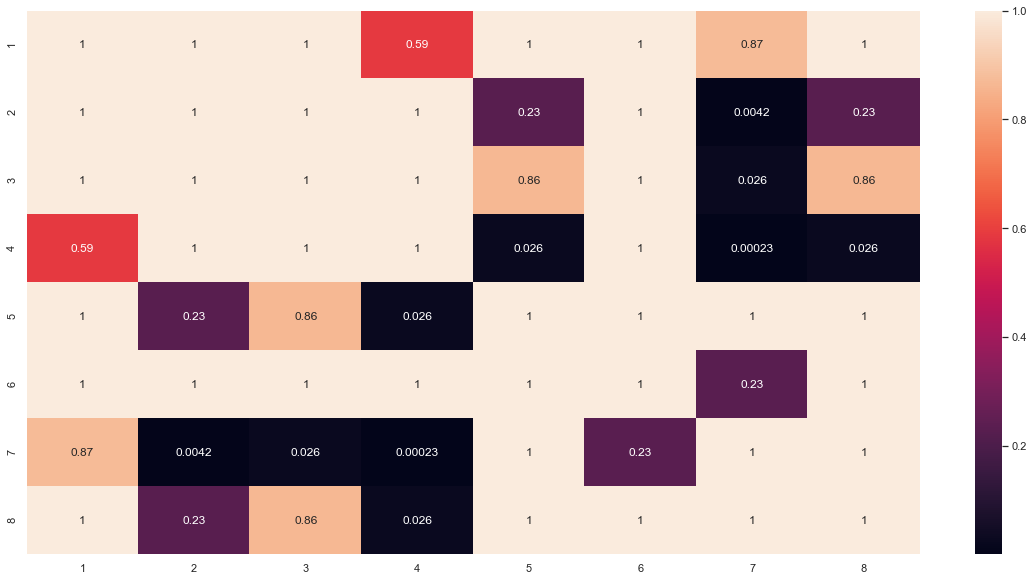

In [210]:
sns.heatmap(dunn2,annot=True)

### INFERENCES:
### 1.Stats,Machine Learning,Analytical Skills and Communication is statistically significant from Big Data Analytical Tools.
### 2.Communication skills are more important than SQL,Domain knowledge and Big Data Analytical Tools as per the sample survey
### 3.For a Data Scientist, we can conclude that Stats,Machine Learning,Analytical Skills and Communication skills are important as per the sample survey

# SKILL COMPARISING BETWEEN DATA SCIENTIST AND DATA ANALYST
# USING HYPOTHESIS TESTING 


We are comparing their skills to understand wheather they are significantly different or not.Through this we are trying to give an insight to prioritise the skill required for each job role.

In [113]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
from pylab import rcParams
from scipy.stats import f_oneway
from scipy.stats import ttest_ind

In [114]:
%matplotlib inline
warnings.filterwarnings("ignore")
rcParams['figure.figsize'] = 20,10
rcParams['font.size'] = 30
sns.set()
np.random.seed(8)

In [115]:
def plot_distribution(inp):
    plt.figure()
    ax = sns.distplot(inp)
    plt.axvline(np.mean(inp), color="k", linestyle="dashed", linewidth=5)
    _, max_ = plt.ylim()
    plt.text(
        inp.mean() + inp.mean() / 10,
        max_ - max_ / 10,
        "Mean: {:.2f}".format(inp.mean()),
    )
    return plt.figure

In [116]:
Data1
py = Data1['python'].values

In [117]:
st= Data2['python'].values

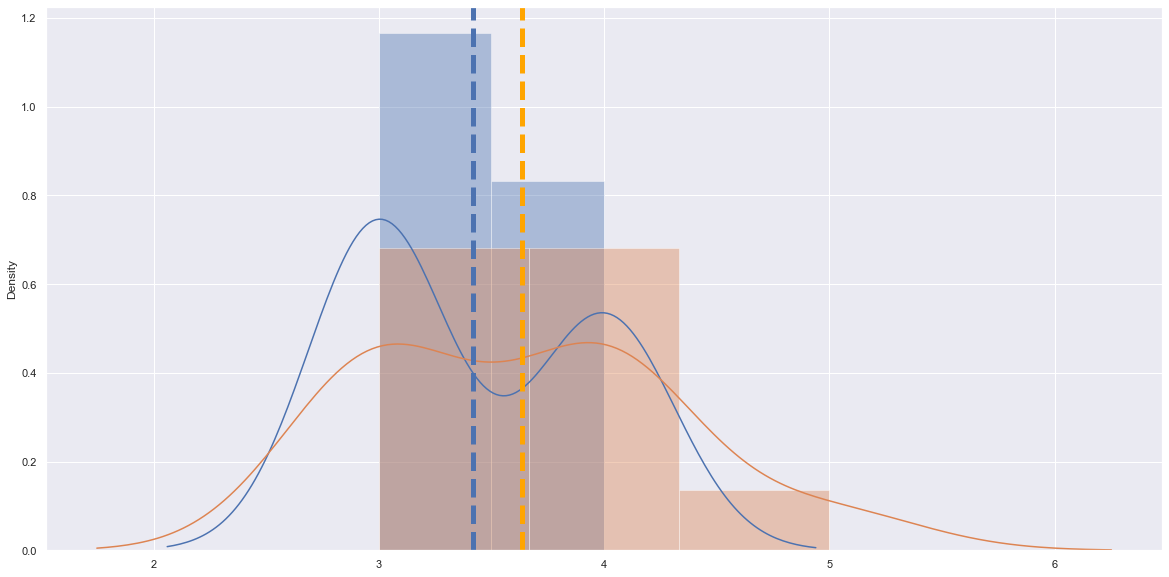

In [110]:
plt.figure()
ax1 = sns.distplot(st)
ax2 = sns.distplot(py)
plt.axvline(np.mean(st), color='b', linestyle='dashed', linewidth=5)
plt.axvline(np.mean(py), color='orange', linestyle='dashed', linewidth=5)

In [118]:
def compare_2_groups(arr_1, arr_2, alpha, sample_size):
    stat, p = ttest_ind(arr_1, arr_2)
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    if p > alpha:
        print('Same distributions (fail to reject H0)')
    else:
        print('Different distributions (reject H0)')

In [119]:
d = Data1['python'].values

In [120]:
e = Data2['python'].values

In [121]:
compare_2_groups(d,e,0.05,11)

Statistics=-1.096, p=0.285
Same distributions (fail to reject H0)


Here the Pvalue which we got is 0.285(>0.05), from that we conclude that null hypothesis is accepted. This clearly proves that both job roles require almost similar approach to python.

# Statistics and machine learning

In [136]:
py = Data1['stats'].values

In [137]:
st= Data2['stats'].values

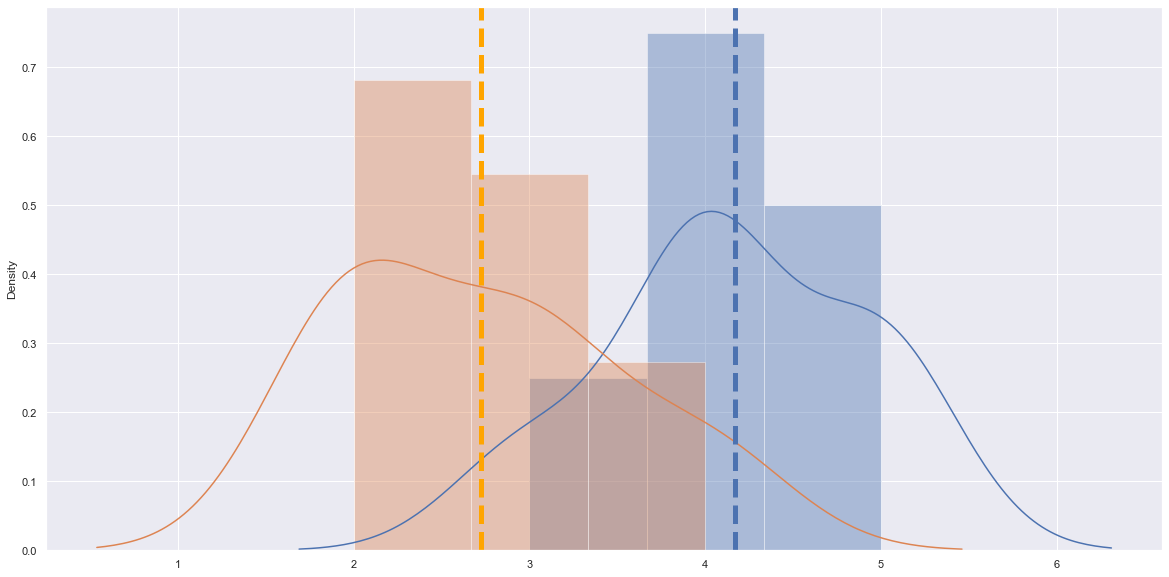

In [138]:
plt.figure()
ax1 = sns.distplot(st)
ax2 = sns.distplot(py)
plt.axvline(np.mean(st), color='b', linestyle='dashed', linewidth=5)
plt.axvline(np.mean(py), color='orange', linestyle='dashed', linewidth=5)

In [139]:
compare_2_groups(py,st,0.05,11)

Statistics=-4.591, p=0.000
Different distributions (reject H0)


Here the Pvalue which is less than 0.05 and so the null hypothesis is rejected. This shows that both job roles are not having similar approach towards stats and machine learning.
As we seen that they are significantly different. Data scientist having greater mean shows that knwoledge of statistics and Machine learning of Data scientist should be  more than that of  Data analyst.

# Analytical skills

In [143]:
py = Data1['analytical'].values

In [144]:
st = Data2['analytical'].values

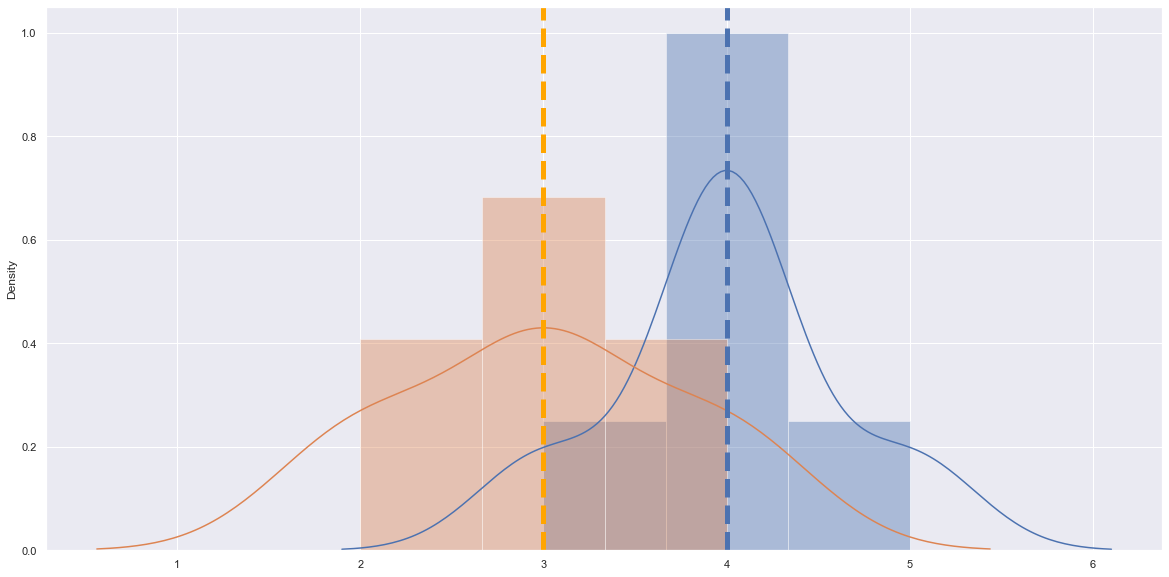

In [145]:
plt.figure()
ax1 = sns.distplot(st)
ax2 = sns.distplot(py)
plt.axvline(np.mean(st), color='b', linestyle='dashed', linewidth=5)
plt.axvline(np.mean(py), color='orange', linestyle='dashed', linewidth=5)

In [146]:
compare_2_groups(py,st,0.05,11)

Statistics=-3.472, p=0.002
Different distributions (reject H0)


Here the Pvalue which is less than 0.05 and so the null hypothesis is rejected. This shows that both job roles are not having similar approach towards analytical skills.
As we seen that they are significantly different. Data scientist having greater mean shows that knwoledge of analyticals of Data scientist should be  more than that of  Data analyst.

# COMMUNICATION


In [151]:
py = Data1['communication'].values
st= Data2['communication'].values

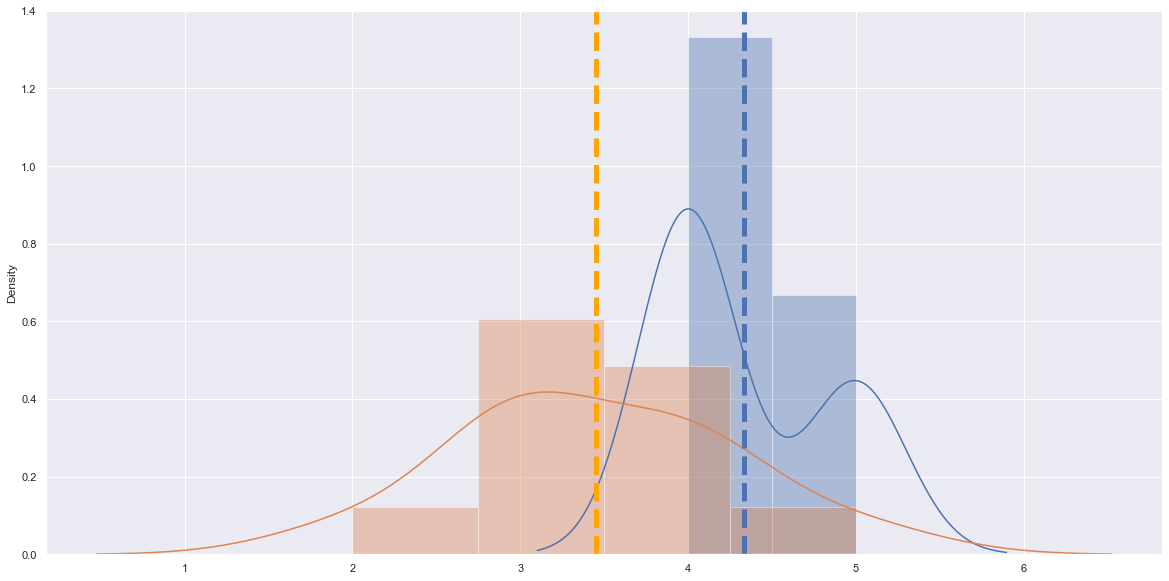

In [152]:
plt.figure()
ax1 = sns.distplot(st)
ax2 = sns.distplot(py)
plt.axvline(np.mean(st), color='b', linestyle='dashed', linewidth=5)
plt.axvline(np.mean(py), color='orange', linestyle='dashed', linewidth=5)

In [153]:
compare_2_groups(py,st,0.05,11)

Statistics=-3.148, p=0.005
Different distributions (reject H0)


Here the Pvalue which is less than 0.05 and so the null hypothesis is rejected. This shows that both job roles are not having similar approach towards Communication skills.
As we seen that they are significantly different. Data scientist having greater mean shows that communication of Data scientist should be  more than that of  Data analyst.

# DOMAIN

In [154]:
py = Data1['domain'].values

In [155]:
st= Data2['domain'].values

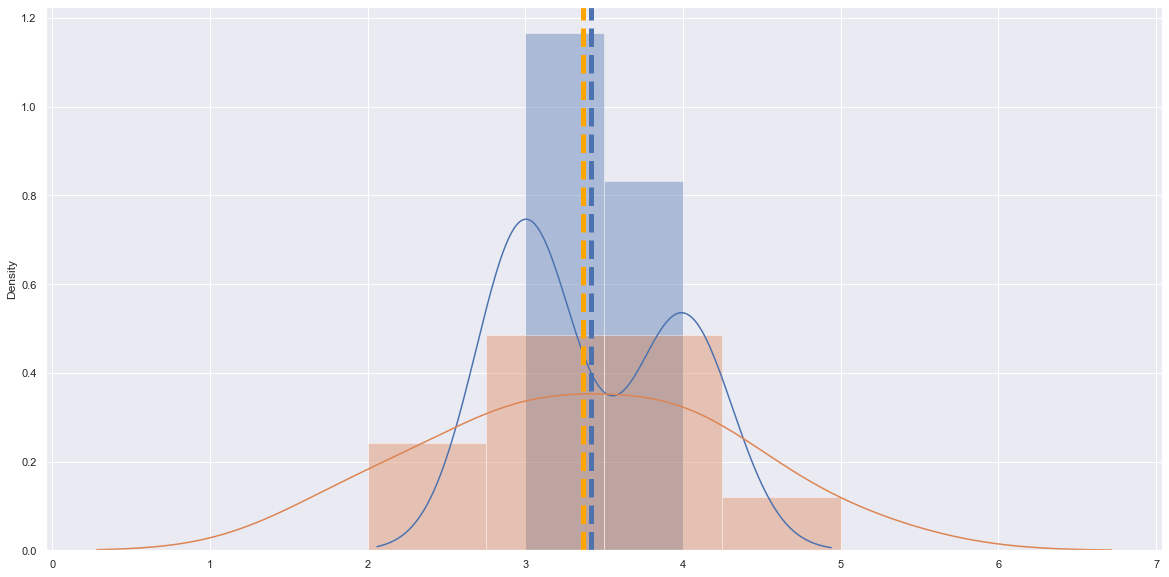

In [156]:
plt.figure()
ax1 = sns.distplot(st)
ax2 = sns.distplot(py)
plt.axvline(np.mean(st), color='b', linestyle='dashed', linewidth=5)
plt.axvline(np.mean(py), color='orange', linestyle='dashed', linewidth=5)

In [157]:
compare_2_groups(py,st,0.05,11)

Statistics=-0.172, p=0.865
Same distributions (fail to reject H0)


Here the Pvalue which we got is 0.865(>0.05), from that we conclude that null hypothesis is accepted. This clearly proves that both job roles require almost similar approach to Domain knowledge.

# Visualisation

In [158]:
py = Data1['visualisation'].values

In [159]:
st = Data2['visualisation'].values

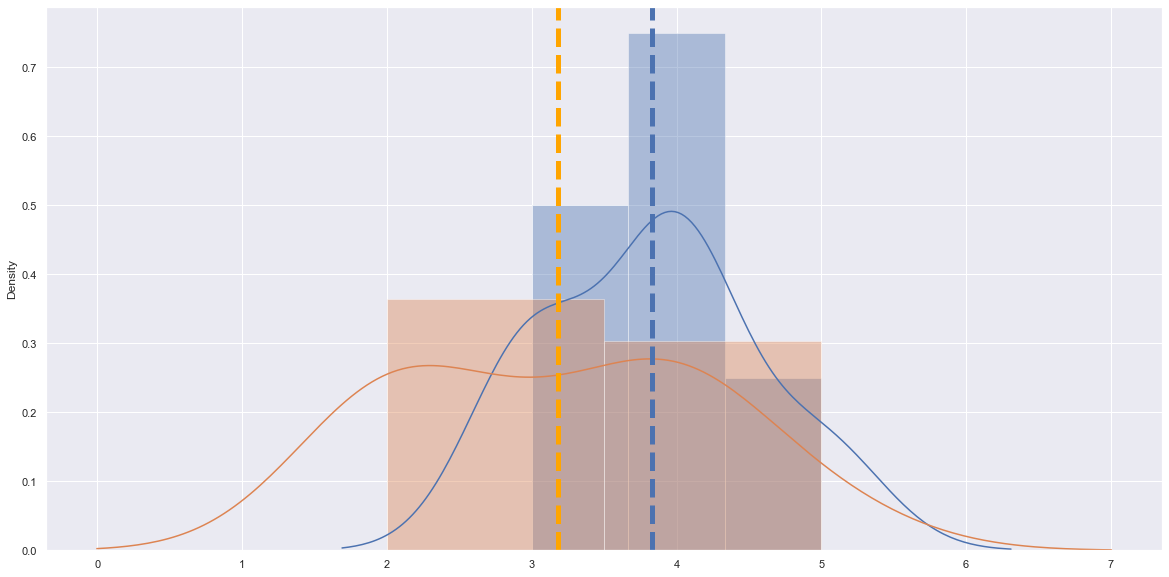

In [160]:
plt.figure()
ax1 = sns.distplot(st)
ax2 = sns.distplot(py)
plt.axvline(np.mean(st), color='b', linestyle='dashed', linewidth=5)
plt.axvline(np.mean(py), color='orange', linestyle='dashed', linewidth=5)

In [161]:
compare_2_groups(py,st,0.05,11)

Statistics=-1.719, p=0.100
Same distributions (fail to reject H0)


Here the Pvalue which we got is 0.1(>0.05), from that we conclude that null hypothesis is accepted. This clearly proves that both job roles require almost similar approach to visualisation knowledge.

# BIG DATA TOOLS

In [170]:
py = Data1['big data'].values

In [171]:
st = Data2['big data'].values

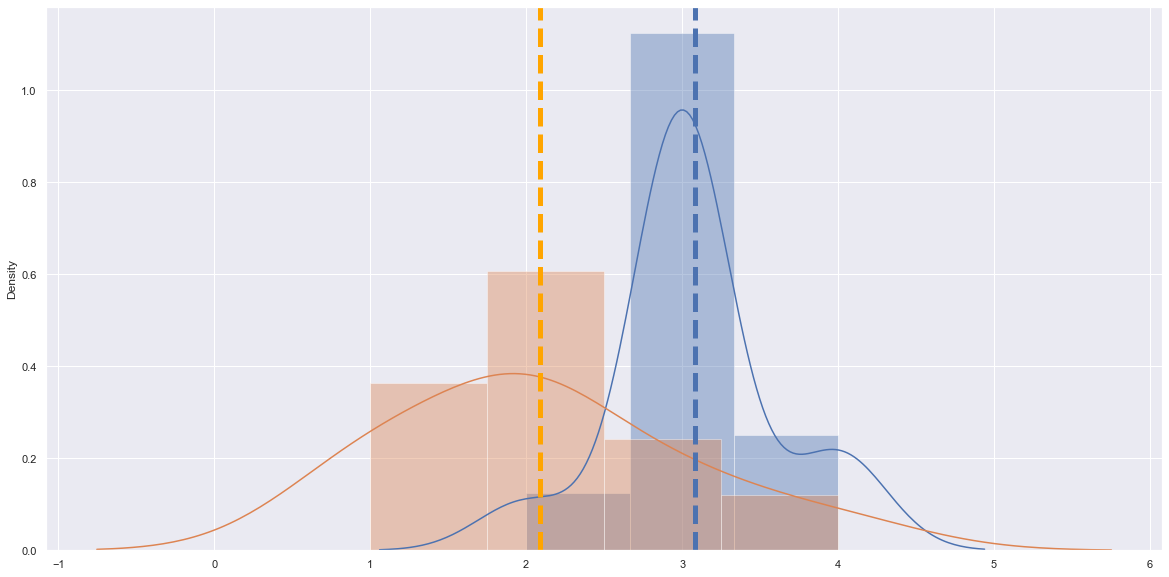

In [172]:
plt.figure()
ax1 = sns.distplot(st)
ax2 = sns.distplot(py)
plt.axvline(np.mean(st), color='b', linestyle='dashed', linewidth=5)
plt.axvline(np.mean(py), color='orange', linestyle='dashed', linewidth=5)

In [173]:
compare_2_groups(py,st,0.05,11)

Statistics=-3.168, p=0.005
Different distributions (reject H0)


Here the Pvalue which is less than 0.05 and so the null hypothesis is rejected. This shows that both job roles are not having similar approach towards bigdata.
As we seen that they are significantly different. Data scientist having greater mean shows that knwoledge of big data tools of Data scientist should be  more than that of  Data analyst.

# SQL

In [174]:
py = Data1['sql'].values

In [175]:
st = Data2['sql'].values

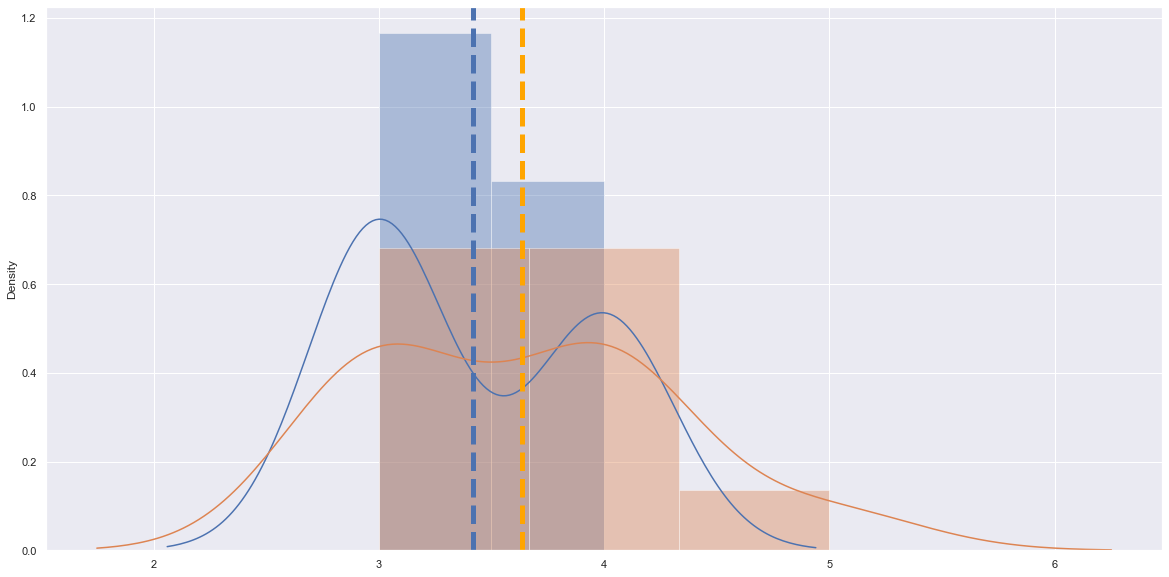

In [176]:
plt.figure()
ax1 = sns.distplot(st)
ax2 = sns.distplot(py)
plt.axvline(np.mean(st), color='b', linestyle='dashed', linewidth=5)
plt.axvline(np.mean(py), color='orange', linestyle='dashed', linewidth=5)

In [177]:
compare_2_groups(py,st,0.05,11)

Statistics=0.883, p=0.387
Same distributions (fail to reject H0)


Here the Pvalue which we got is 0.387(>0.05), from that we conclude that null hypothesis is accepted. This clearly proves that both job roles require almost similar approach to SQL knowledge.

### CONCLUSION

#### After collecting responses from professionals based on different job roles and the level of skills required for that job role and performing statistical tests on them,we conclude that:
#### 1.Using Estimation,the confidence intervals of each skill under each job role have been calculated with 95% confidence interval to show the representive nature of collected data.
#### 2.Using Kurkswallis test,for each job role which all skills are more important have also been identified according to the collected sample.
#### 3.There is significant difference in skills required for each job role and among them Data Analyst and Data Scientist were found some similarity and been cleared using Hypothesis Testing.